In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data = pd.read_csv('dc-wikia-data.csv', sep=",")
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [4]:
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [5]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

Обработка пропусков в данных 1.1. Простые стратегии - удаление или заполнение нулями

In [6]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((6896, 13), (6896, 3))

In [7]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((6896, 13), (38, 13))

In [8]:
data_new_3 = data.fillna(0)
data_new_3.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,0,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,0,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,1237.0,"1940, April",1940.0


1.2. "Внедрение значений" - импьютация (imputation) 1.2.1. Обработка пропусков в числовых данных

In [9]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)        
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 355.
Колонка YEAR. Тип данных float64. Количество пустых значений 69.


In [10]:
# Фильтр по пустым значениям поля MasVnrArea 
data[data['YEAR'].isnull()]
# Сохраняем индексы
flt_index = data[data['YEAR'].isnull()].index
flt_index

Int64Index([ 386, 1400, 1401, 1832, 1937, 1938, 2065, 2066, 2067, 2230, 2231,
            2232, 2413, 2414, 2841, 2842, 3104, 3105, 3431, 3432, 3433, 3434,
            3435, 3819, 3820, 3821, 3822, 3823, 3824, 4320, 4321, 4322, 4323,
            4826, 4827, 4828, 4829, 5525, 5526, 5527, 5528, 5529, 5530, 5531,
            5532, 5533, 5534, 5535, 5536, 5537, 5538, 6532, 6533, 6534, 6535,
            6536, 6537, 6538, 6539, 6540, 6887, 6888, 6889, 6890, 6891, 6892,
            6893, 6894, 6895],
           dtype='int64')

In [11]:
for rows in flt_index:
  data.YEAR[rows]=data.YEAR.median()

c:\users\vovan\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
# Фильтр по пустым значениям поля MasVnrArea 
data[data['YEAR'].isnull()]
# Сохраняем индексы
flt_index = data[data['YEAR'].isnull()].index
flt_index

Int64Index([], dtype='int64')

In [13]:
data[data['APPEARANCES'].isnull()]
# Сохраняем индексы
flt_index = data[data['APPEARANCES'].isnull()].index
flt_index

Int64Index([6541, 6542, 6543, 6544, 6545, 6546, 6547, 6548, 6549, 6550,
            ...
            6886, 6887, 6888, 6889, 6890, 6891, 6892, 6893, 6894, 6895],
           dtype='int64', length=355)

In [14]:
data.APPEARANCES = data.APPEARANCES.mean()

1.2.2. Обработка пропусков в категориальных данных

In [15]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count,temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 2013, 29.19%.
Колонка ALIGN. Тип данных object. Количество пустых значений 601, 8.72%.
Колонка EYE. Тип данных object. Количество пустых значений 3628, 52.61%.
Колонка HAIR. Тип данных object. Количество пустых значений 2274, 32.98%.
Колонка SEX. Тип данных object. Количество пустых значений 125, 1.81%.
Колонка GSM. Тип данных object. Количество пустых значений 6832, 99.07%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.04%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 69, 1.0%.


In [16]:
MaxPassEmbarked = data.groupby('ALIVE').count()['page_id']
data.ALIVE[data.ALIVE.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

data[data[col].isnull()].shape[0]

c:\users\vovan\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0

Преобразование категориальных признаков в числовые

In [17]:
data.ALIGN.replace({'Good Characters':'1','Bad Characters':'0'},inplace=True)
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,1,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,23.625134,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,1,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,23.625134,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,1,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,23.625134,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,1,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,23.625134,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,1,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,23.625134,"1940, April",1940.0


In [18]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

data.ALIGN = label.fit_transform(data.ALIGN.astype(str))
label.fit(data.ALIGN.drop_duplicates()) #задаем список значений для кодирования

dicts['ALIGN'] = list(label.classes_)
data.ALIGN = label.transform(data.ALIGN) #заменяем значения из списка кодами закодированных элементов 
flt_index = data['ALIGN'].unique()
flt_index

array([1, 0, 2, 4, 3], dtype=int64)

In [19]:
import pandas 
cat_columns = ['ID']
data_processed = pandas.get_dummies(data, prefix_sep="__",
                              columns=cat_columns)
data_processed

,page_id,name,urlslug,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,ID__Identity Unknown,ID__Public Identity,ID__Secret Identity
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),1,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,23.625134,"1939, May",1939.0,0,0,1
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),1,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,23.625134,"1986, October",1986.0,0,0,1
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),1,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,23.625134,"1959, October",1959.0,0,0,1
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),1,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,23.625134,"1987, February",1987.0,0,1,0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),1,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,23.625134,"1940, April",1940.0,0,0,1
5,1448,Wonder Woman (Diana Prince),\/wiki\/Wonder_Woman_(Diana_Prince),1,Blue Eyes,Black Hair,Female Characters,NaN,Living Characters,23.625134,"1941, December",1941.0,0,1,0
6,1486,Aquaman (Arthur Curry),\/wiki\/Aquaman_(Arthur_Curry),1,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,23.625134,"1941, November",1941.0,0,1,0
7,1451,Timothy Drake (New Earth),\/wiki\/Timothy_Drake_(New_Earth),1,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,23.625134,"1989, August",1989.0,0,0,1
8,71760,Dinah Laurel Lance (New Earth),\/wiki\/Dinah_Laurel_Lance_(New_Earth),1,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,23.625134,"1969, November",1969.0,0,1,0
9,1380,Flash (Barry Allen),\/wiki\/Flash_(Barry_Allen),1,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,23.625134,"1956, October",1956.0,0,0,1


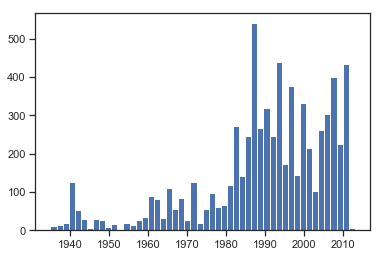

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['YEAR']])
plt.hist(data['YEAR'], 50)
plt.show()

Масштабирование данных на основе Z-оценки

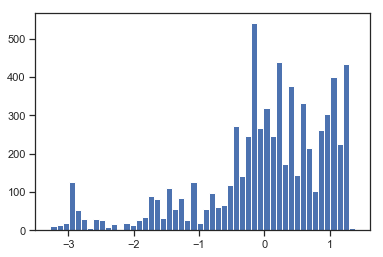

In [21]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['YEAR']])

plt.hist(sc2_data, 50)
plt.show()

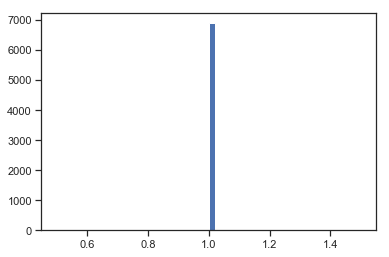

In [22]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['YEAR']])
flt_index = data['YEAR'].unique()
flt_index
plt.hist(sc3_data, 50)
plt.show()